**BUSINESS PROBLEM**

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project Objective:

To generate insights to help XYZ identify the right company to make their investment.

In next sections we will analyze data in the following process:

Data Intake and Preliminary Processing
Compare Yellow Cab and Pink Cab from different aspects
Investment Recommendation

In [337]:
# Importing Basic Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import pyarrow.parquet as pq  # Parquet file handling
import seaborn as sns  # Data visualization
import matplotlib as map  # Plotting utilities
import matplotlib.pyplot as plt  # Plotting library
import datetime as dt  # Date and time operations

# Importing all the models and all dependent libraries.
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.pipeline import Pipeline  # Building pipelines
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical data
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
import sklearn.linear_model as lm  # Linear models
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.linear_model import Lasso  # Lasso Regression
from sklearn.linear_model import Ridge  # Ridge Regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor
import xgboost as xgb  # XGBoost Regressor
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Regression metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

import warnings  # Suppressing warnings
warnings.filterwarnings('ignore')

**2.IMPORT DATASETS**

In [281]:
# Load your datasets
cab_df = pd.read_csv("Cab_Data.csv")
txn_df = pd.read_csv("Transaction_ID.csv")
cust_df = pd.read_csv("Customer_ID.csv")
city_df = pd.read_csv("City.csv")
holidays_df = pd.read_csv("Holidays.csv")

In [282]:
#display first five columns of each dataset
from IPython.display import display

print("Cab Data:")
display(cab_df.head())

print("Transaction Data:")
display(txn_df.head())

print("Customer Data:")
display(cust_df.head())

print("City Data:")
display(city_df.head())

print("Holidays Data:")
display(holidays_df.head())


Cab Data:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Transaction Data:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Customer Data:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


City Data:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Holidays Data:


,Holidays
0,01-01-2022
1,17-01-2022
2,21-02-2022
3,30-05-2022
4,04-07-2022


**CAB_DATA DATASET**

In [283]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [284]:
#check for shape of the dataset
print("Cab Dataset shape is : ",cab_df.shape)

Cab Dataset shape is :  (359392, 7)


In [285]:
#check for missing values
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [286]:
#check for duplicates
cab_df.duplicated().sum()

0

In [287]:
#quick overview of the data distribution
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


**TRANSACTION DATASET**

In [288]:
txn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [289]:
#check for shape of the dataset
print("Transaction Dataset shape is : ",txn_df.shape)

Transaction Dataset shape is :  (440098, 3)


In [290]:
#check for missing values
txn_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [291]:
#check for duplicates
txn_df.duplicated().sum()

0

In [292]:
#quick overview of the data distribution
txn_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


**CITY DATASET**

In [293]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [294]:
#check for shape of the dataset
print("City Dataset shape is : ",city_df.shape)

City Dataset shape is :  (20, 3)


In [295]:
#check for missing values
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [296]:
city_df.duplicated().sum()

0

**PERFORM MERGING DATA SETS TO COME UP WITH A MASTER DATASET**

In [297]:
# Step 1: Merge Cab_Data with Transaction_ID on 'Transaction ID'
cab_txn_df = pd.merge(cab_df, txn_df, on='Transaction ID', how='left')

In [298]:
cab_txn_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [299]:
#step 2:Merge with Customer_ID on 'Customer ID
cab_txn_cust = pd.merge(cab_txn_df, cust_df, on='Customer ID', how='left')

In [300]:
# Step 3: Merge with City.csv on 'City'
cab_txn_cust_city = pd.merge(cab_txn_cust, city_df, on='City', how='left')

In [301]:
cab_txn_cust_city.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In [302]:
import pandas as pd

# Convert Excel serial to datetime
cab_txn_cust_city['Date of Travel'] = pd.to_datetime(cab_txn_cust_city['Date of Travel'], unit='D', origin='1899-12-30')


In [307]:
holidays_df['Holidays'] = pd.to_datetime(holidays_df['Holidays'], dayfirst=True, errors='coerce')



In [308]:
master_df = pd.merge(
    cab_txn_cust_city,
    holidays_df,
    left_on='Date of Travel',
    right_on='Holidays',
    how='left'
)


In [309]:
# Step 2: Add a 'Holiday' column: True if matched, False otherwise
master_df['Holiday'] = master_df['Holidays'].notna()

# Drop the redundant 'Holidays' column, not the new 'Holiday' flag
master_df.drop(columns=['Holidays'], inplace=True)


In [310]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [311]:
master_df.columns = master_df.columns.str.replace(' ', '_')


In [312]:
master_df.rename(columns={'income_usdmonth': 'income_usd_per_month'}, inplace=True)


In [313]:
master_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",False
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",False
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",False
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",False
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",False


In [314]:
print(master_df.columns.tolist())


['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age', 'Income_(USD/Month)', 'Population', 'Users', 'Holiday']


In [315]:
# Convert 'Users' and 'Population' columns to numeric (if not already)
master_df['Users'] = pd.to_numeric(master_df['Users'], errors='coerce')
master_df['Population'] = pd.to_numeric(master_df['Population'], errors='coerce')

In [316]:
master_df['Year'] = master_df['Date_of_Travel'].dt.year
master_df['Month'] = master_df['Date_of_Travel'].dt.month
master_df['Profit'] = master_df['Price_Charged'] - master_df['Cost_of_Trip']
master_df['Profit_Rate'] = (master_df['Profit'] / master_df['Cost_of_Trip']) * 100
master_df['Profit_per_km'] = master_df['Profit'] / master_df['KM_Travelled']
master_df['User_ratio'] = (master_df['Users'] / master_df['Population']) * 100

**2.EXPLORATORY DATA ANALYSIS**

Comparative Analysis: Yellow Cab vs. Pink Cab
In this section, we analyze key metrics to compare Yellow Cab and Pink Cab, addressing the following questions:

1. **Profitability & Market Share**

What is the overall profit rate in the cab market?

Which company achieves a higher profit rate?

Does Yellow Cab dominate the market share compared to Pink Cab?

2. **Consumer Preferences & Demographics**

Do customers prefer Yellow Cab over Pink Cab?

Which company serves higher-income passengers?

3. **Geographic Performance & Future Outlook**

Which company is more dominant in specific cities?

<Axes: xlabel='Profit_per_km', ylabel='Count'>

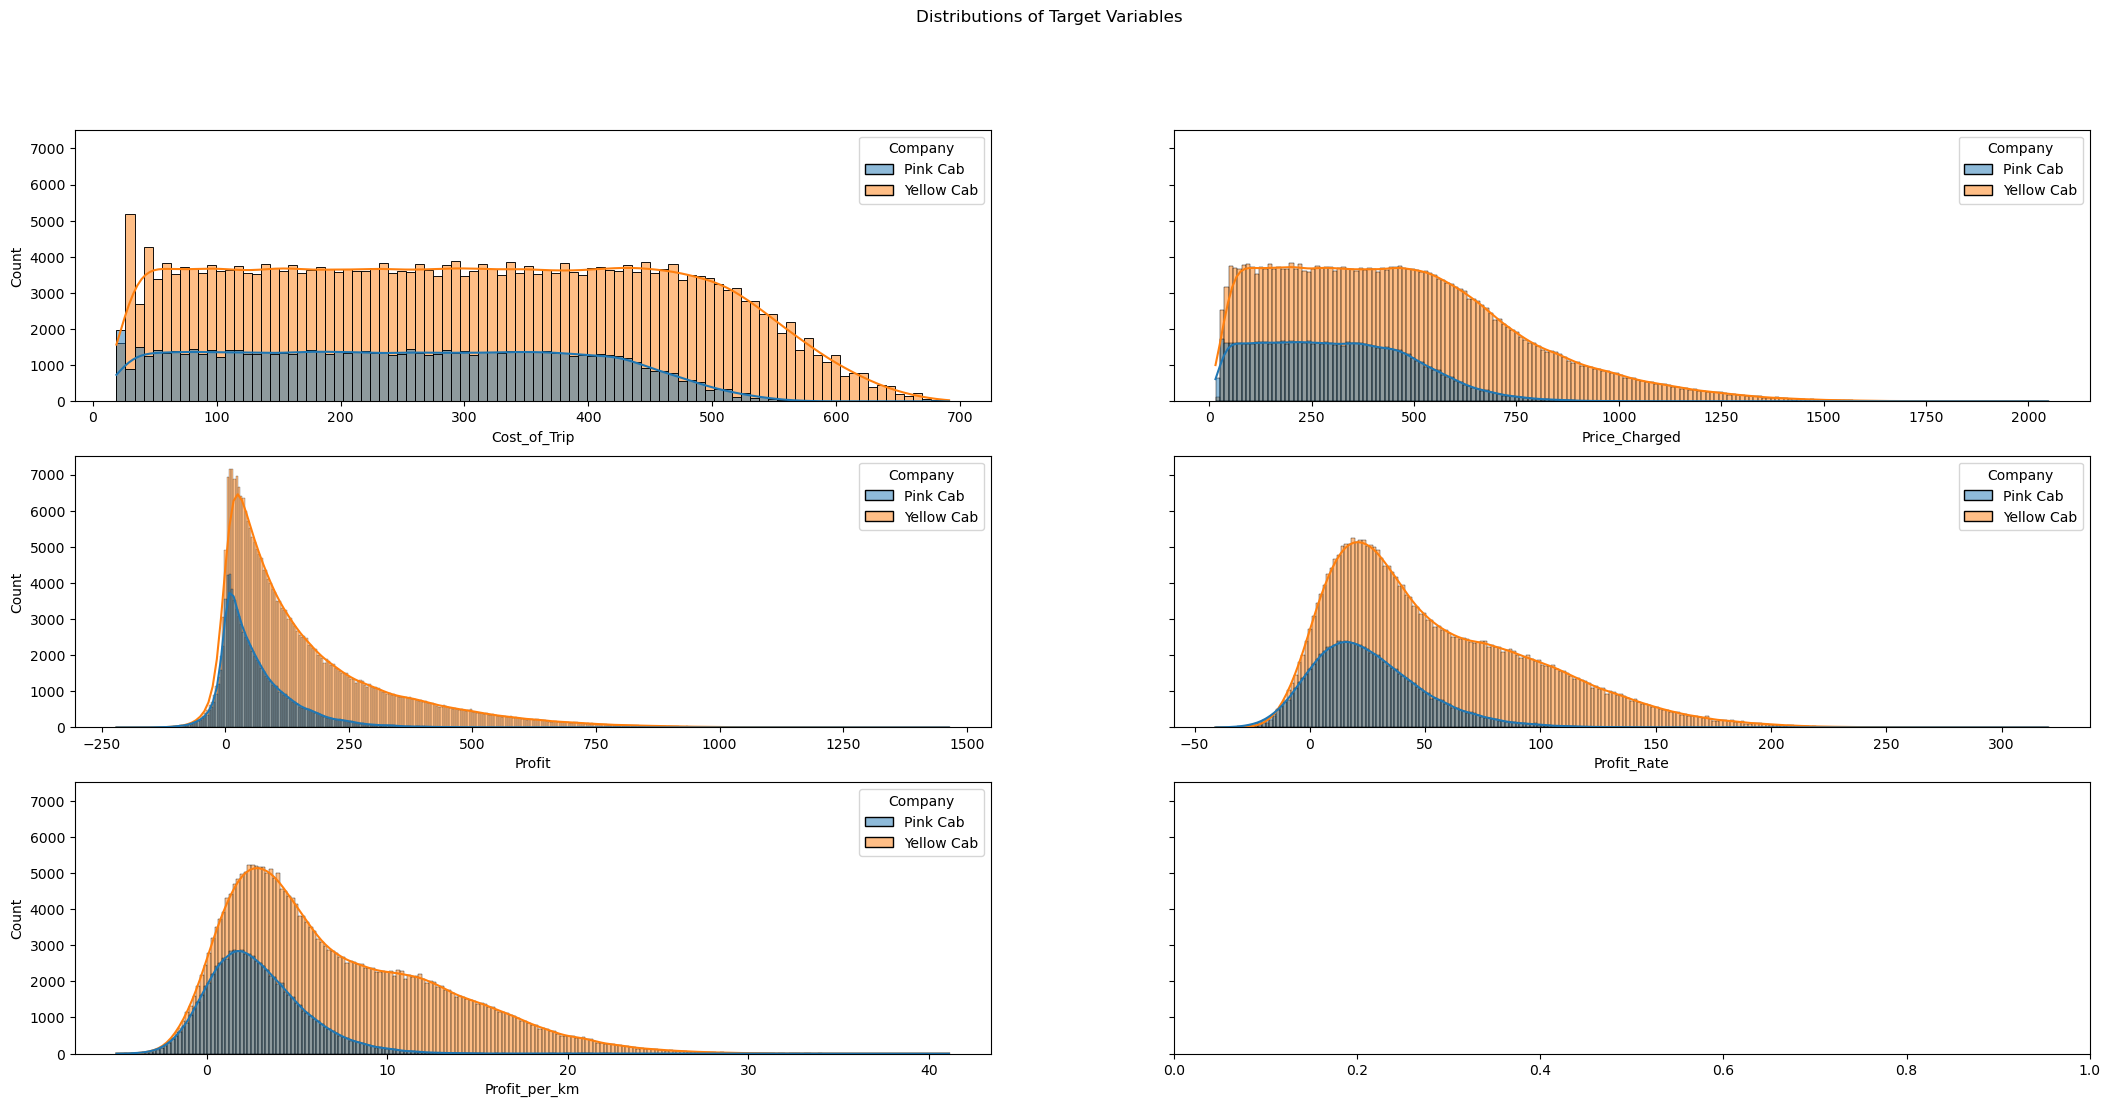

In [317]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=master_df , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=master_df , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=master_df , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=master_df , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=master_df , x='Profit_per_km' , kde = True , hue="Company")

We can see from the last three figures that distributions of profits are all right skewed. But Yellow Cab has a visible bump to the right of peak in the distribution of Profit Rate and Profit per KM, which will probably lead to higher total profit rate. So we will check company's profit rate next.

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
Year                                      
2016     27.659727   56.719546   50.864915
2017     26.953767   56.683707   50.586278
2018     21.427914   48.213674   42.691567


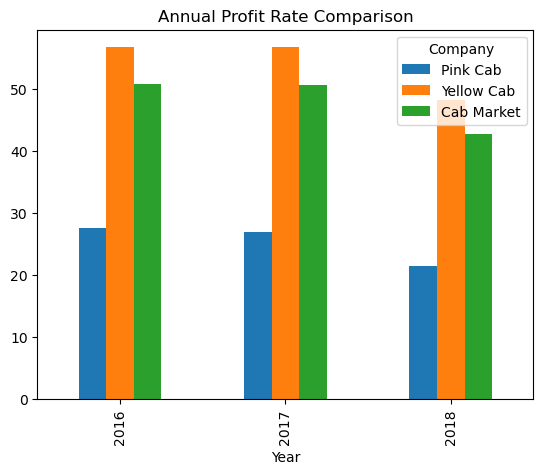

In [318]:
# Annual_Profit_Rate = master_df.groupby(['Year','Company']).Profit.sum().unstack()/master_df.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = master_df.groupby(['Year']).Profit.sum()/master_df.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

From the last figure and table, we can see that Yellow Cab does have higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year. And one of the reasons is Yellow Cab consistently outperforms Pink Cab, maintaining a significantly higher profit rate across all three years.

Market Trends: While Yellow Cab leads, the overall Cab Market profit rate trends closely follow its performance.

Declining Profit: In 2018, all profit rates show a decline compared to previous years, possibly due to external market factors or operational challenges.

**REVENUE VS COST**

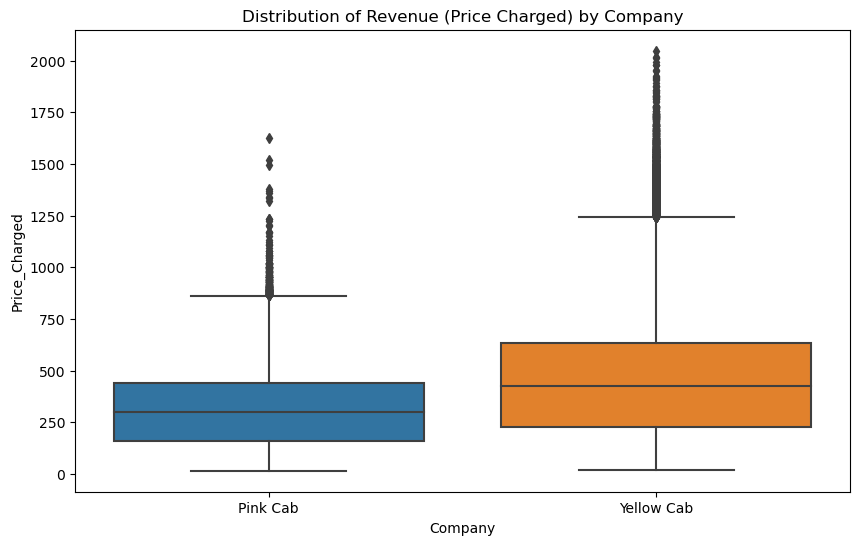

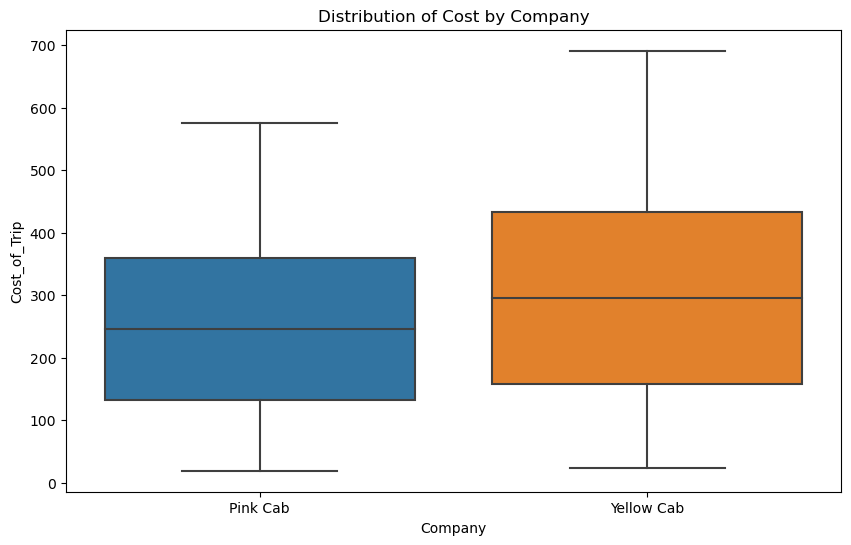

In [320]:
plt.figure(figsize=(10,6))
sb.boxplot(x='Company', y='Price_Charged', data=master_df)
plt.title("Distribution of Revenue (Price Charged) by Company")
plt.show()

plt.figure(figsize=(10,6))
sb.boxplot(x='Company', y='Cost_of_Trip', data=master_df)
plt.title("Distribution of Cost by Company")
plt.show()


While both companies have some extreme pricing outliers, Yellow Cab generally charges higher prices overall compared to Pink Cab.

**Customer Demographics**
Income Distribution per Company

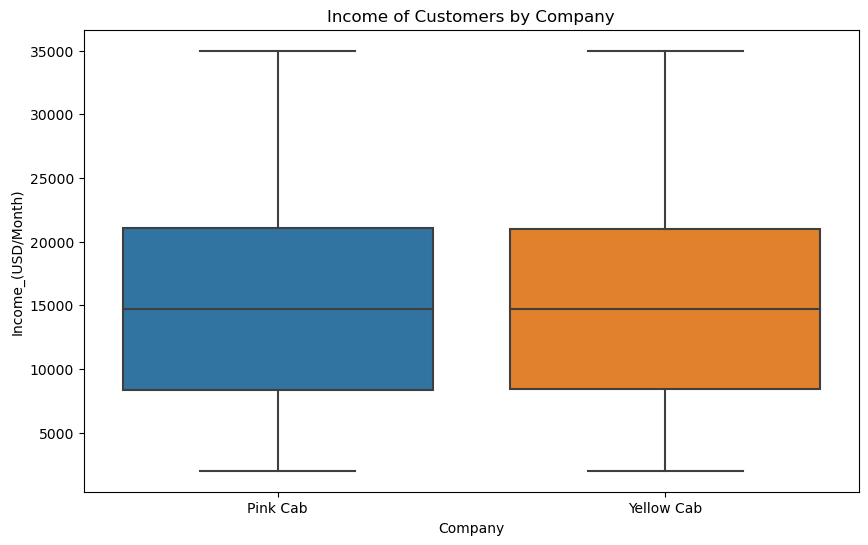

In [321]:
plt.figure(figsize=(10,6))
sb.boxplot(x='Company', y='Income_(USD/Month)', data=master_df)
plt.title("Income of Customers by Company")
plt.show()


the similar shapes of the box plots for both companies suggest that their customer income distributions are quite comparable in terms of central tendency and variability. 

**GENDER SPLIT**

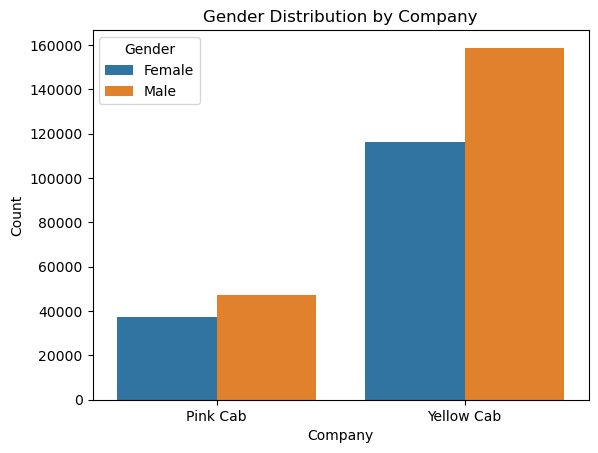

In [266]:
gender_dist = master_df.groupby(['Company', 'Gender']).size().reset_index(name='Count')
sb.barplot(x='Company', y='Count', hue='Gender', data=gender_dist)
plt.title("Gender Distribution by Company")
plt.show()


 Both companies have a higher number of male users compared to female users. However, Yellow Cab also shows a larger overall male users compared to Pink Cab.

**PROFIT PER CITY PER COMPANY**

In [322]:
from matplotlib.ticker import ScalarFormatter

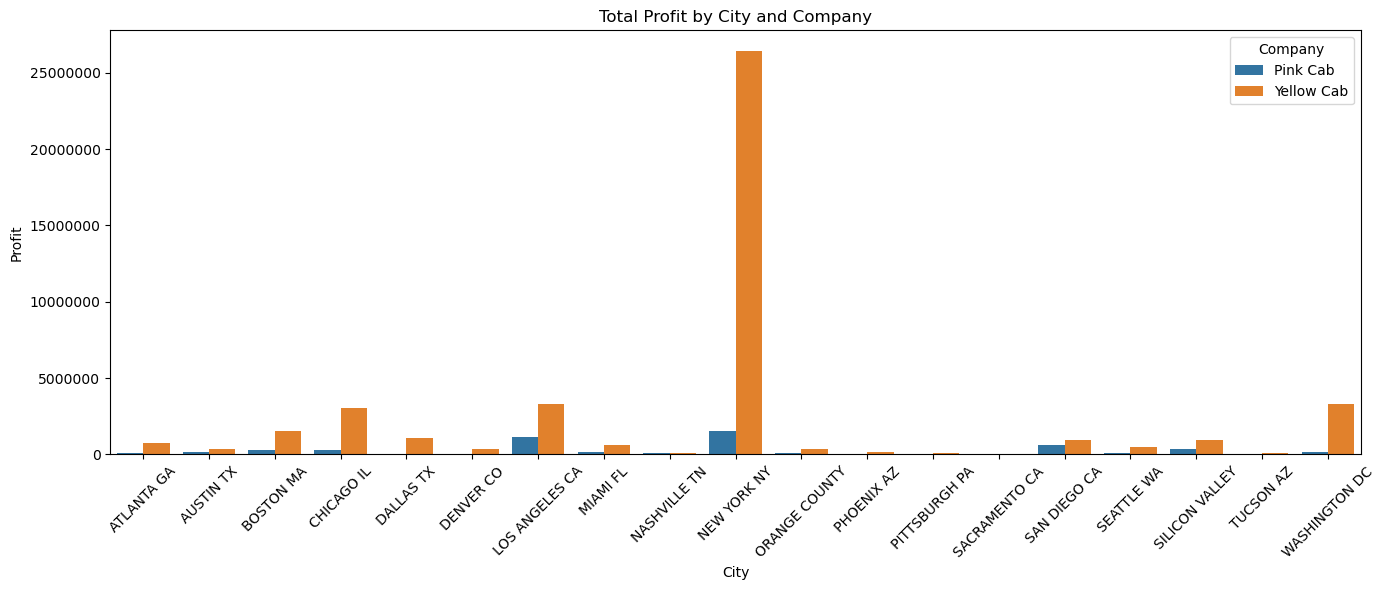

In [323]:
city_profit = master_df.groupby(['City', 'Company'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sb.barplot(x='City', y='Profit', hue='Company', data=city_profit)
plt.xticks(rotation=45)
plt.title("Total Profit by City and Company")

# Remove scientific notation from y-axis
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')  # Force plain style (no scientific notation)

plt.tight_layout()
plt.show()

Yellow Cab enjoys significantly higher profits in most of the cities compared to Pink Cab. The contrast is so marked that in many instances, the orange bars tower over the blue ones. Notably, the chart highlights that New York NY is where Yellow Cab reaches its peak profit, suggesting this market plays a pivotal role in its overall revenue strategy.

**TEMPORAL TRENDS**

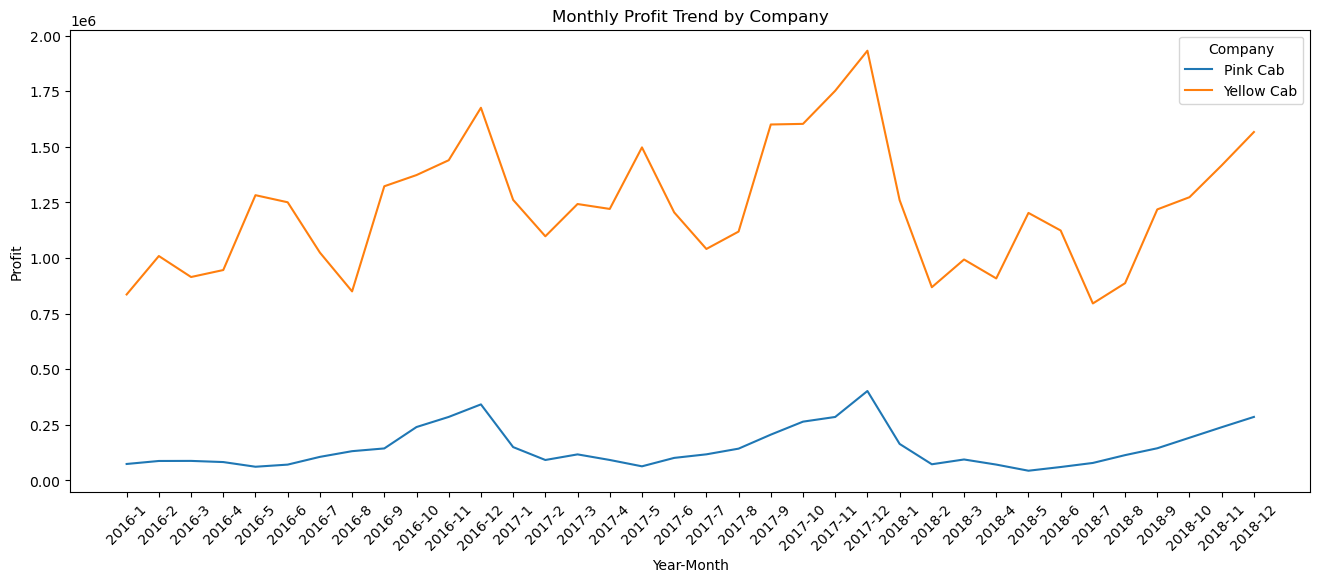

In [271]:
monthly_profit = master_df.groupby(['Year', 'Month', 'Company'])['Profit'].sum().reset_index()
monthly_profit['Year-Month'] = monthly_profit['Year'].astype(str) + '-' + monthly_profit['Month'].astype(str)

plt.figure(figsize=(16, 6))
sb.lineplot(data=monthly_profit, x='Year-Month', y='Profit', hue='Company')
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend by Company")
plt.show()


Pink Cab (Blue Line): Shows steady and consistent growth with minor fluctuations, reflecting a stable, sustainable business model.

Yellow Cab (Orange Line): Exhibits higher profits overall but with significant volatility, marked by sharp spikes in mid-2017 and mid-2018. This suggests aggressive strategies or external factors driving short-term gains.

**PROFITABILITY VS DISTANCE(EFFICIENCY)**

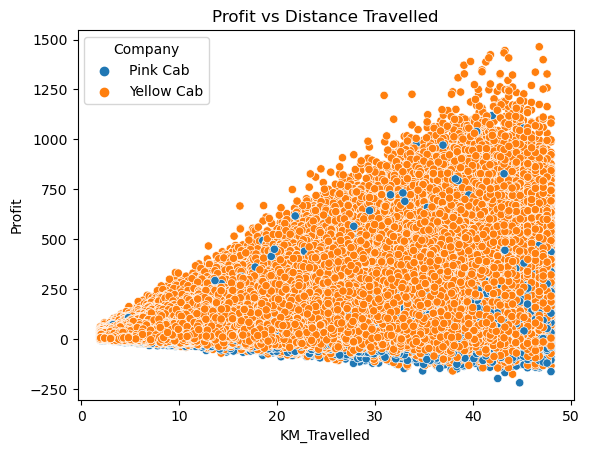

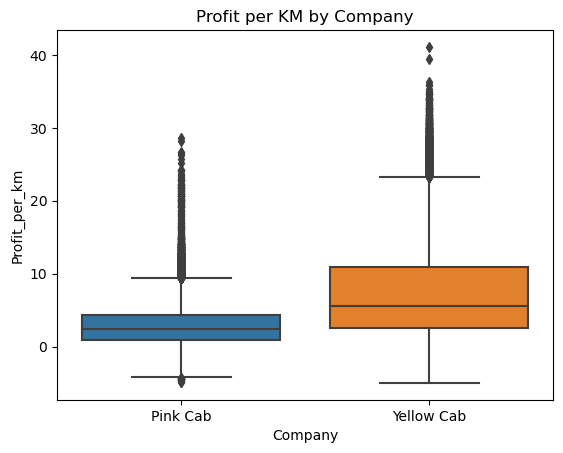

In [324]:
sb.scatterplot(data=master_df, x='KM_Travelled', y='Profit', hue='Company')
plt.title("Profit vs Distance Travelled")
plt.show()

sb.boxplot(data=master_df, x='Company', y='Profit_per_km')
plt.title("Profit per KM by Company")
plt.show()


The scatter plot shows that as the distance traveled increases, the profit generally increases for both companies, with Yellow Cab typically making higher profits and having a denser grouping of data points.

**HOLIDAY IMPACT ON PROFIT**

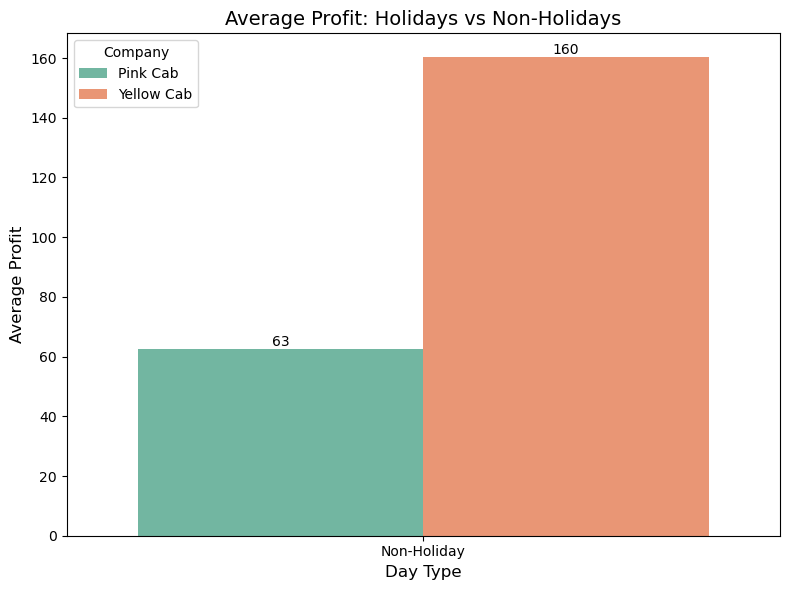

In [325]:
import seaborn as sb
import matplotlib.pyplot as plt

# Replace True/False with clearer labels
master_df['Holiday_Label'] = master_df['Holiday'].map({True: 'Holiday', False: 'Non-Holiday'})

# Group by the labeled holiday status
holiday_profit = master_df.groupby(['Holiday_Label', 'Company'])['Profit'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sb.barplot(x='Holiday_Label', y='Profit', hue='Company', data=holiday_profit, palette='Set2')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title("Average Profit: Holidays vs Non-Holidays", fontsize=14)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Average Profit", fontsize=12)
plt.tight_layout()
plt.show()


Payment Mode Preferences

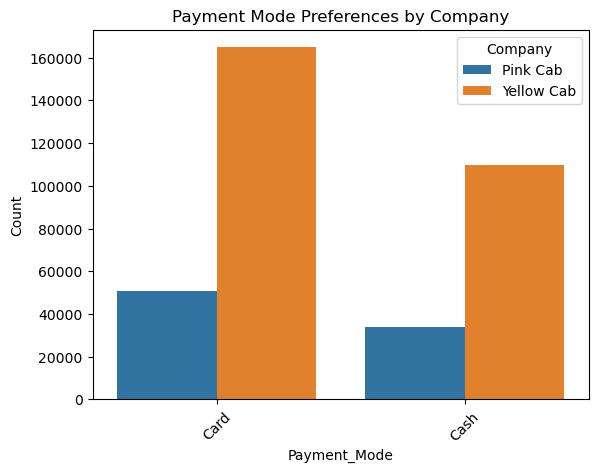

In [327]:
payment_counts = master_df.groupby(['Company', 'Payment_Mode']).size().reset_index(name='Count')
sb.barplot(data=payment_counts, x='Payment_Mode', y='Count', hue='Company')
plt.title("Payment Mode Preferences by Company")
plt.xticks(rotation=45)
plt.show()


Both yellow cab and pink cab companies prefer to pay by card and cash,however majority of users prefer to pay via card in both companies

Age Distribution of Customers

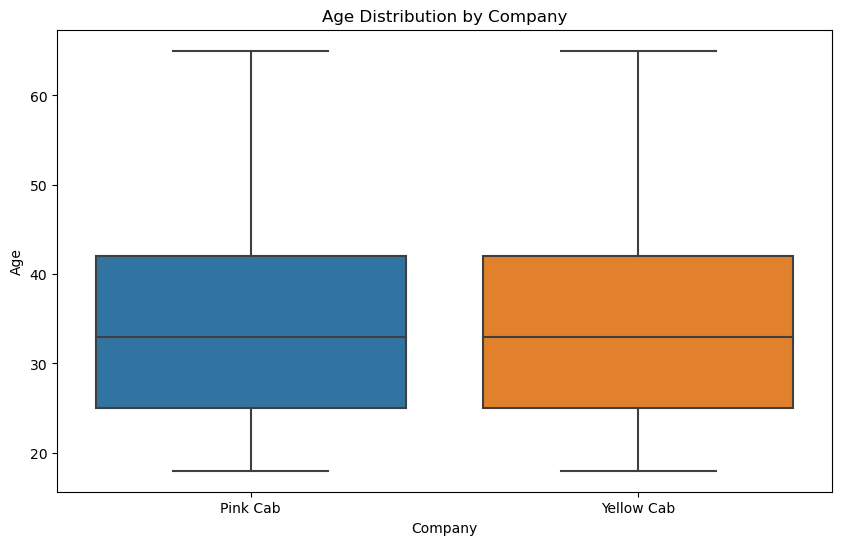

In [328]:
plt.figure(figsize=(10,6))
sb.boxplot(data=master_df, x='Company', y='Age')
plt.title("Age Distribution by Company")
plt.show()


This box plot tells us that while both companies have a similar base in their age spread (starting around age 20 and with the majority between 25 and 40-45), Pink Cab has a higher median age and a broader range, suggesting slightly older and more varied ages among its customers compared to Yellow Cab.

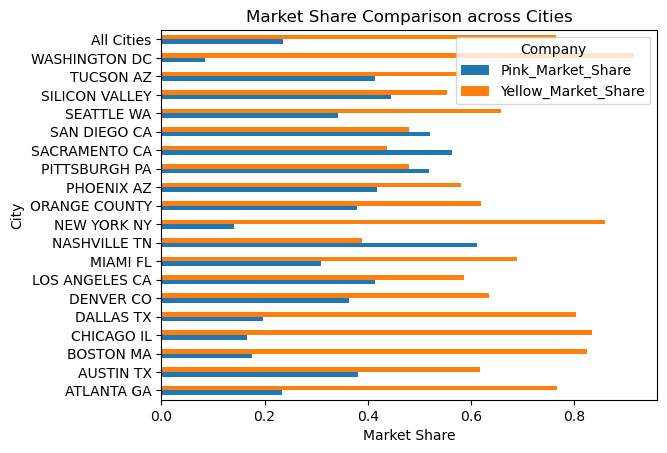

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Merged_Data is your DataFrame that contains the relevant data

# Grouping by City and Company and calculating the number of transactions
Company_Transaction = master_df.groupby(['City', 'Company']).Transaction_ID.count().unstack()

# Adding a row for all cities combined
Company_Transaction.loc['All Cities'] = Company_Transaction.sum(numeric_only=True)

# Adding a column for the total market in each city (sum of Pink Cab and Yellow Cab transactions)
Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']

# Calculating the market share for Pink and Yellow Cab at each city
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab'] / Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab'] / Company_Transaction['City_Market']

# Plotting the market share comparison as a horizontal bar chart
ax = Company_Transaction.iloc[:, 3:5].plot(kind='barh', stacked=False, title='Market Share Comparison across Cities')

# Show the plot
plt.xlabel('Market Share')
plt.ylabel('City')
plt.show()


Assume Pink and Yellow Cab are the only two cab companies operating in the USA. Nationally, Yellow Cab's market share is three times greater than that of Pink Cab, and this advantage is reflected in most cities across the country. Given that market share is closely linked to the number of cabs owned by each company, Yellow Cab's superior market share can be seen as a stable and enduring advantage, likely driven by a larger fleet size and a more widespread presence compared to Pink Cab.



Text(0, 0.5, 'Yellow Cab')

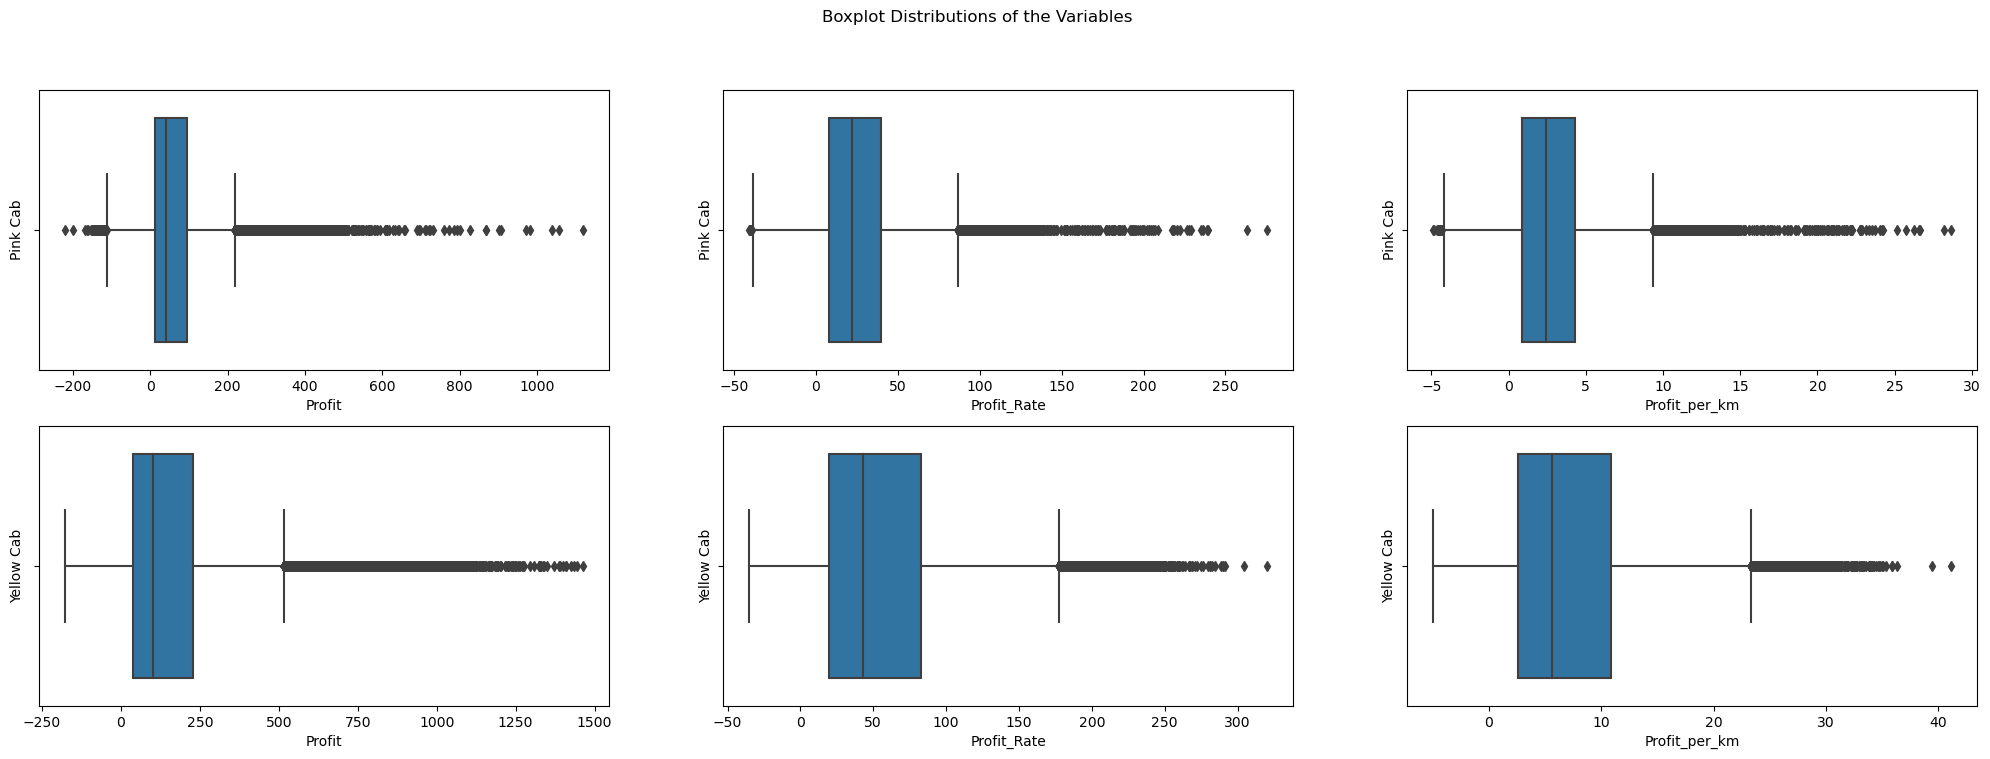

In [330]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Profit' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Profit_Rate' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Profit_per_km' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Profit' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Profit_Rate' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Profit_per_km' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

Profit:

Range: Pink (-200 to 1000), Yellow (-250 to 1500)

Insight: Yellow Cab has a wider range, implying higher profit potential but also greater loss risk

Profit Rate:

Range: Pink (-50 to 250), Yellow (-50 to 300)

Insight: Yellow Cab has a slightly higher upper limit, indicating potential for better margins, though both cabs share similar risks at the lower end.

Profit per km:

Range: Pink (-5 to 30), Yellow (-10 to 40)

Insight: Yellow Cab again shows more variability in efficiency, suggesting operational highs and lows.

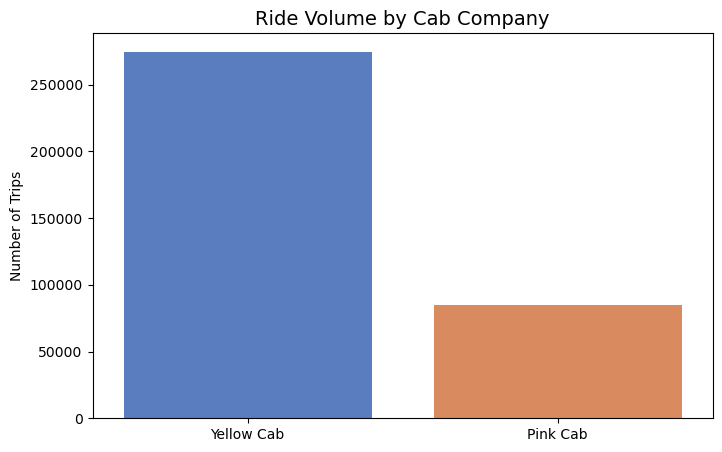

In [331]:
#check for the count of number of users of both yellow and pink cab
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter

# Compute counts and percentages
counts = master_df['Company'].value_counts()
df_comp = counts.rename_axis('Company').reset_index(name='count')
df_comp['percent'] = (df_comp['count'] / df_comp['count'].sum() * 100).round(1)

# Plot
plt.figure(figsize=(8, 5))
g = sb.barplot(
    data=df_comp,
    x='Company',
    y='count',
    palette='muted',
    order=df_comp['Company']
)
plt.title("Ride Volume by Cab Company", fontsize=14)
plt.xlabel("")
plt.ylabel("Number of Trips")

plt.show()

From 2016 to 2018, most cab users travelled with Yellow Cab company

In [332]:
from sklearn.preprocessing import LabelEncoder
Data = master_df.drop(['Transaction_ID', 'Customer_ID'], axis=1)
le = LabelEncoder()
Data["Gender"] = le.fit_transform(Data["Gender"])
Data["City"] = le.fit_transform(Data["City"])
Data["Payment_Mode"] = le.fit_transform(Data["Payment_Mode"])
Pink_Data = Data[Data['Company'] == 'Pink Cab'] 
Yellow_Data = Data[Data['Company'] == 'Yellow Cab']
Data["Company"] = le.fit_transform(Data["Company"])
Data

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),...,Users,Holiday,Year,Month,Profit,Profit_Rate,Profit_per_km,User_ratio,Year-Month,Holiday_Label
0,2016-01-08,0,0,30.45,370.95,313.6350,0,1,28,10813,...,NaN,False,2016,1,57.3150,18.274427,1.882266,NaN,2016-1,Non-Holiday
1,2016-01-06,0,0,28.62,358.52,334.8540,0,1,27,9237,...,NaN,False,2016,1,23.6660,7.067558,0.826904,NaN,2016-1,Non-Holiday
2,2016-01-02,0,0,9.04,125.20,97.6320,1,1,53,11242,...,NaN,False,2016,1,27.5680,28.236644,3.049558,NaN,2016-1,Non-Holiday
3,2016-01-07,0,0,33.17,377.40,351.6020,1,1,23,23327,...,NaN,False,2016,1,25.7980,7.337273,0.777751,NaN,2016-1,Non-Holiday
4,2016-01-03,0,0,8.73,114.62,97.7760,0,1,33,8536,...,NaN,False,2016,1,16.8440,17.227131,1.929439,NaN,2016-1,Non-Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,1,18,4.80,69.24,63.3600,1,1,24,15651,...,NaN,False,2018,1,5.8800,9.280303,1.225000,NaN,2018-1,Non-Holiday
359388,2018-01-04,1,18,8.40,113.75,106.8480,1,1,32,6528,...,NaN,False,2018,1,6.9020,6.459644,0.821667,NaN,2018-1,Non-Holiday
359389,2018-01-05,1,18,27.75,437.07,349.6500,1,1,56,7966,...,NaN,False,2018,1,87.4200,25.002145,3.150270,NaN,2018-1,Non-Holiday
359390,2018-01-05,1,18,8.80,146.19,114.0480,0,1,32,6423,...,NaN,False,2018,1,32.1420,28.182870,3.652500,NaN,2018-1,Non-Holiday


Text(0, 0.5, 'Yellow Cab')

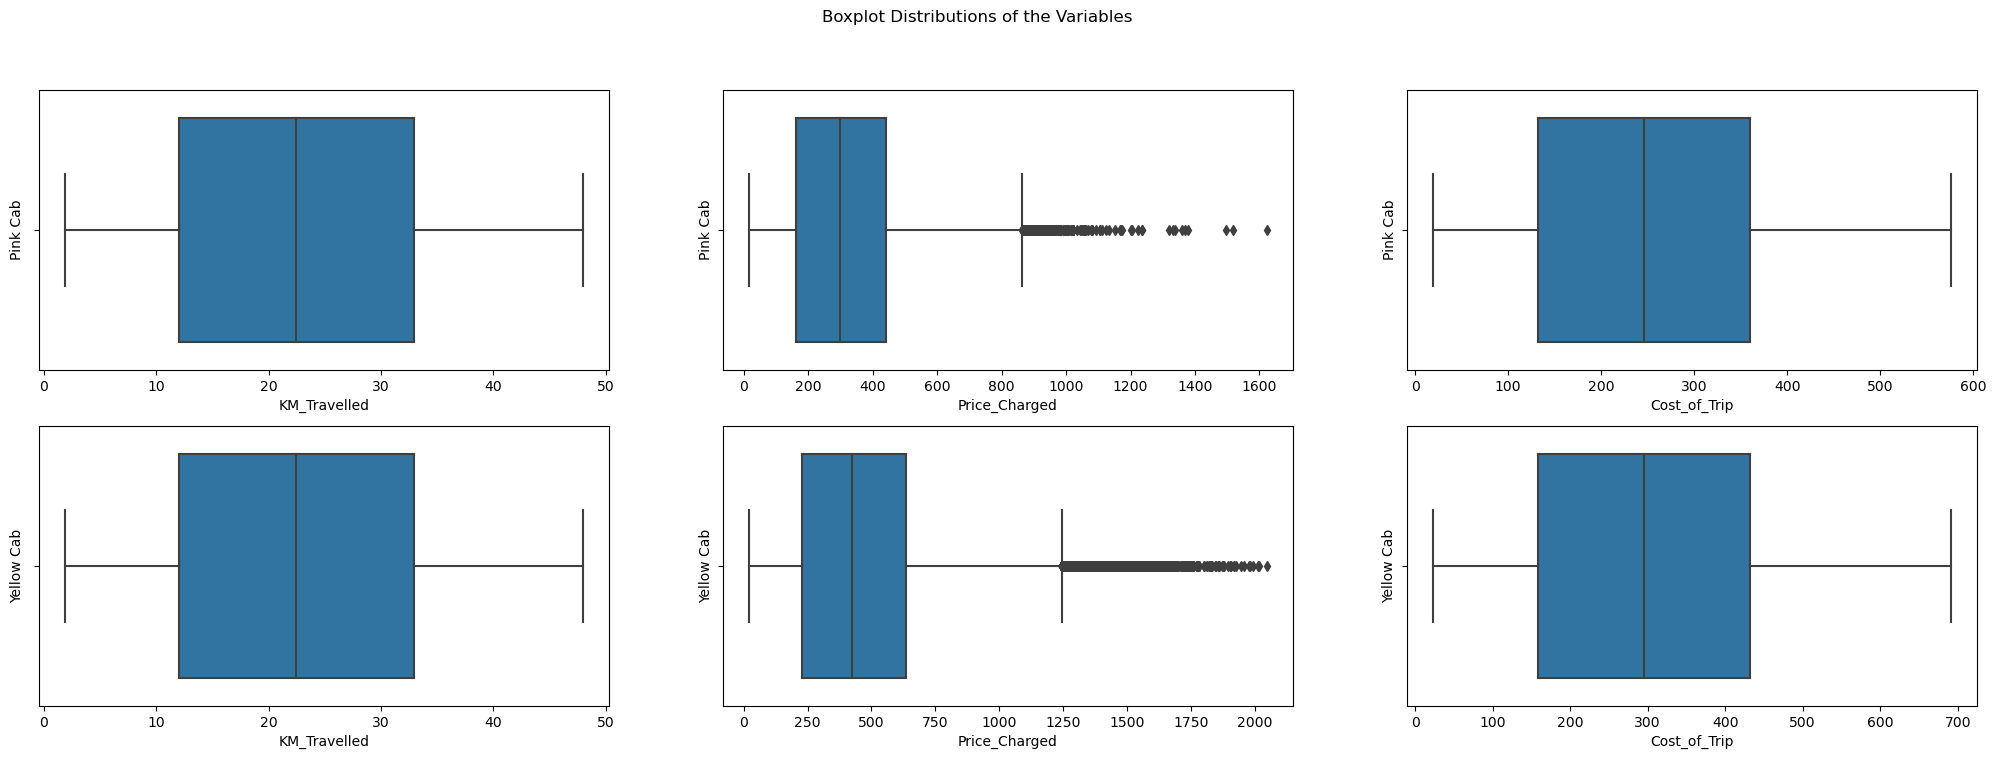

In [333]:
# Check out more distributions of variables using Boxplot
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")


Travel Distance Consistency: Both cab types show similar distributions for distance traveled, suggesting comparable ride lengths regardless of the cab type.

Pricing Differences: Yellow Cabs charge higher prices on average, with more pronounced outliers, indicating potential differences in pricing strategies, service levels, or market targeting.

Cost-to-Charge Ratio: Despite pricing differences, the operational cost of trips is similar for both cab types, suggesting consistent underlying cost structures.

Let's review the questions asked at the beginning of this section:

**3.1 What's the profit rate of Cab market? Which company has higher profit rate?**

Ans: 50% is the profit of Cab Market, and Yellow Cab has higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year.

**3.2 Does Yellow Cab have bigger market share than Pink Cab?**

Ans: Yes, Yellow Cab's market share is two times greater than Pink Cab's, though customer number is just 0.5 time greater.

**3.3 Do Customers prefer Yellow Cab to Pink Cab?**

Ans: Not very clear from the data.

**3.4 Who serves the higher income**

Ans:There isn't very high difference in customer characteristics of both companies.

**3.5 Which company prevail in which city?**

Ans:Yellow Cab prevails in most cities except San Diego, Sacramento, Pittsburgh, and Nashville.

**3.6 Can Yellow Cab make more profit in the future?**

Ans:There are only three years of data, we are not sure whether Yellow cab can keep up their profit indexes as there is a decreasing in 2018 compared to 2016 and 2017. But Yellow Cab should be able to continue to earn more profit than Pink Cab with dominant market share and better pricing strategy.**

**4. Investment Recommendation**
According to the analysis in Section 3, we recommend XYZ company to invest in Yellow Cab.